In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [4]:
class PCA():
    # Initialize PCA object
    def __init__(self, n_components=0.95):
        # Set the number of components
        self.n_components = n_components
        # Determine whether to use variance or variance ratio for component selection
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    # Fit PCA to the input data
    def fit(self, X):
        # Compute the mean and standard deviation of the input data
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        # Standardize the input data
        X_standardized = (X - self.mean) / self.std
        # Compute the covariance matrix
        self.C = np.cov(X_standardized.T)
        # Compute the eigenvectors and eigenvalues of the covariance matrix
        eigen_values, eigen_vectors = np.linalg.eig(self.C)
        # Sort eigenvalues and corresponding eigenvectors in descending order
        idx_sort = eigen_values.argsort()[::-1]
        eigen_values = eigen_values[idx_sort]
        eigen_vectors = eigen_vectors[:, idx_sort]
        # Determine the number of components based on the specified type
        if self.type == 'ratio':
            var_percentage = eigen_values / eigen_values.sum()
            idx = np.where(np.cumsum(var_percentage) <= self.n_components)[0][-1]
            self.eig_values = eigen_values[:idx+1]
            self.components = eigen_vectors[:, :idx+1]
        else:
            self.eig_values = eigen_values[:self.n_components]
            self.components = eigen_vectors[:, :self.n_components]
        # Project the standardized input data onto the selected principal components
        X_new = X_standardized @ self.components
        return X_new

    # Transform data using the fitted PCA model
    def transform(self, Z):
        # Standardize the input data using the mean and standard deviation computed during fitting
        Z_standardized = (Z - self.mean) / self.std
        # Project the standardized input data onto the selected principal components
        Z_new = Z_standardized @ self.components
        return Z_new

    # Optional: Plot explained variance ratio
    def plot_explained_variance(self):
        # Compute eigenvalues and eigenvectors
        eigen_values, _ = np.linalg.eig(self.C)
        # Compute explained variance ratio
        explained_var = eigen_values / eigen_values.sum()
        # Plot cumulative explained variance
        plt.bar(x=np.arange(1, (len(eigen_values))+1), height=np.cumsum(explained_var))
        plt.xlabel('No of Components (PC)')
        plt.ylabel('Explained variance')
        plt.xlim((0.5, len(eigen_values)+0.5))
        plt.xticks(np.arange(1, (len(eigen_values))+1))


In [5]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

In [6]:
print(pca_section.components.shape)

(17, 11)


In [7]:
pca_section.transform(df.values).shape

(8949, 11)

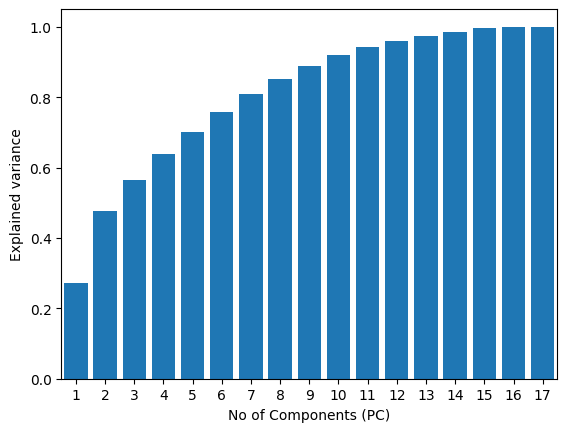

In [8]:
pca_section.plot_explained_variance()

In [9]:
pca_sklearn = PCA(n_components=0.95)

In [10]:
pca_sklearn.fit(df.values)

array([[-1.68236038e+00,  1.07671953e+00, -4.90160162e-01, ...,
         1.16143640e-01, -7.79243349e-02,  2.35213323e-01],
       [-1.13896724e+00, -2.50611200e+00, -6.02490908e-01, ...,
         6.89220415e-01, -7.77698972e-01,  8.71347842e-01],
       [ 9.69377275e-01,  3.83426920e-01, -1.03995390e-01, ...,
        -8.85119522e-01, -1.86702275e-03,  7.61718206e-01],
       ...,
       [-9.25785238e-01,  1.81049007e+00,  4.81547378e-01, ...,
         8.33264538e-01, -8.27837320e-01, -1.21157284e-01],
       [-2.33621138e+00,  6.57801768e-01, -9.68613095e-01, ...,
         1.24891153e+00,  2.70654172e-01,  3.05931345e-01],
       [-5.56043634e-01,  4.00163541e-01, -1.00831119e+00, ...,
        -8.28704005e-01,  3.48017472e-01,  5.04361287e-01]])

In [11]:
pca_sklearn.components.shape

(17, 11)